# Linear regression

## Learning objectives

* Perform linear regression using scikit-learn 
* Explain the concepts of training a linear model that generalises well from few observations
* Explain what training is, in terms of updating coefficients in linear models 
* Understand that these concepts hold in more dimensions 

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form:

$$
y = mx + c
$$

where $m$ is commonly known as the *slope*, and $c$ is commonly known as the *intercept*. $y$ is the value that were trying to predict.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


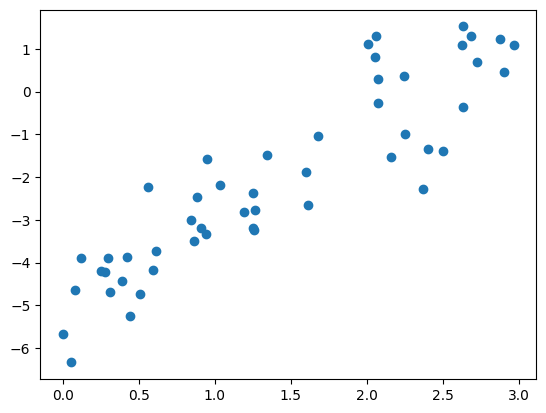

In [35]:
rng = np.random.RandomState(1)

x = 3 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

Lets create a linear model of this data, or a line of best fit, that can help us make predictions. This process is as follows:

* Select a model that we think will represent the data well (i.e. here, a linear model)
* Find the straight line that minimises a distance to each point (i.e. train a model)
* Use this line of best fit to create new predictions, which we can then plot

Finding the line of best fit here means setting the model parameters (i.e. $m$ and $c$) such that they best fit the training data. We can fit a linear model to this data very easily using the `scikit-learn` package:

In [36]:
from sklearn.linear_model import LinearRegression

# Reshape x to 2D vector X: (50,1)
X = x.reshape(-1, 1)

# Create and fit model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

Our slope should be close to 2:

In [37]:
print(f"Slope: {model.coef_}")

Slope: [2.09069603]


Our intercept should be close to -5:

In [38]:
print(f"Intercept: {model.intercept_}")

Intercept: -4.9985770855532055


We can make predictions for a single new data point as so:

In [39]:
x_new = 1.5
X_new = [[1.5]]

y_pred_new = model.predict(X_new)[0]

print(f"New x value: {x_new}, predicted y value: {y_pred_new:.3f}")

New x value: 1.5, predicted y value: -1.863


We can plot this new data point on our graph to see if it roughly fits:

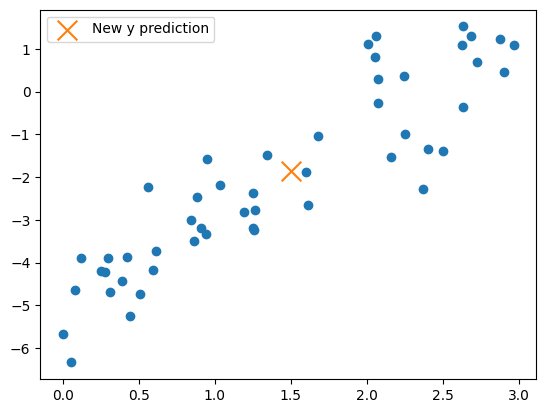

In [40]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred_new, marker="x", s=200, label="New y prediction")
plt.legend();

We have successfully created a single new prediction from a new $x$ value. 

To create a line of best fit, what do we need? We need to use the model to make many predictions. We can create $y_{pred}$, predicted $y$ values from our model, given a vector of input data. Conveniently, we can use our existing $x$ values collectively, as a vector $X$:

In [41]:
y_pred = model.predict(X)

print(y.shape, X.shape)

(50,) (50, 1)


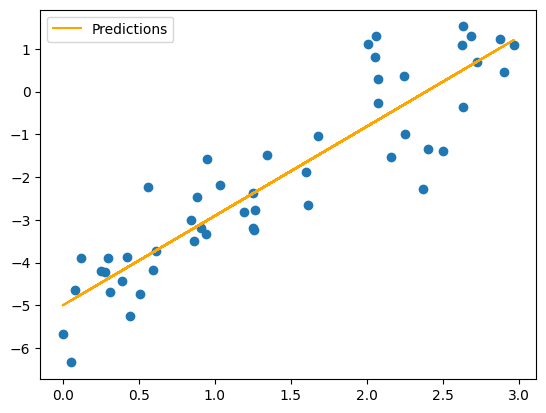

In [42]:
plt.scatter(x, y)
plt.plot(x, y_pred, label="Predictions", c="orange")
plt.legend();

The line plot obfuscates what is going on here. Let's make a scatter plot of our predictions instead:

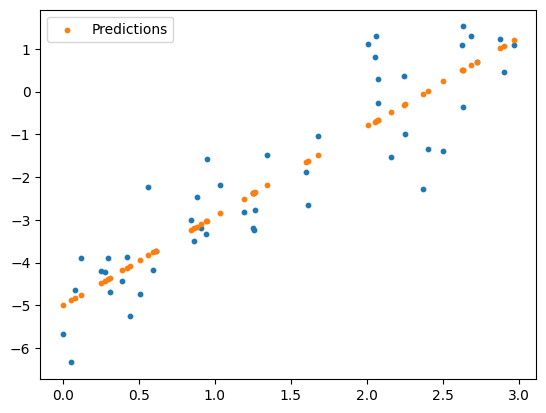

In [43]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, label="Predictions", s=10)
plt.legend();

### What does "best" mean?

When we trained our linear model, we needed to define a cost function. We will talk a bit more about these later, but for a linear model, we commonly use the Root Mean Squared Error ($RMSE$), or just the Mean Squared Error ($MSE$):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where:
- $y_i$ = Actual value of the $i^{th}$ data point
- $\hat{y}_i$ = Predicted value from the regression line, a member of `y_pred`
- $n$ = Total number of data points

We can visualise this by plotting a line between every data point, and every prediction:

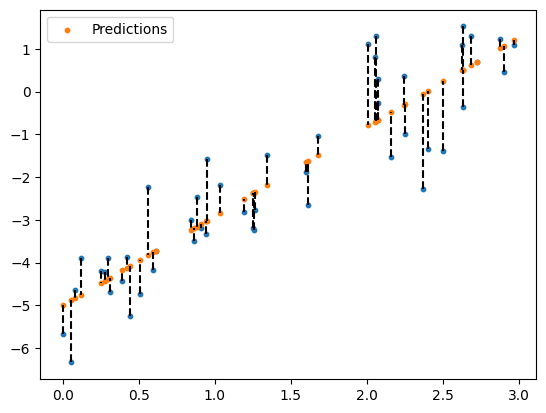

In [44]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, label="Predictions", s=10)

for i, x_i in enumerate(x):
    plt.plot([x_i, x_i], [y[i], y_pred[i]], color='black', linestyle='dashed')

plt.legend();

We dont need to compute $MSE$ manually. We can import this from `scikit-learn`. We will discuss this in more detail later in the course.

In [45]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)

print(f"MSE value: {mse:.3f}")

MSE value: 0.818


### What does training mean?

Now that we have a measure of how well our model fits the data (the $MSE$), how does `scikit-learn` actually set the model coefficients such that the $MSE$ is minimised?

In general, when we use the word training, an iterative approach is implied. For example, some machine learning algorithms use gradient descent to tweak the parameters (or coefficients) such that the cost function is minimised. 

However, linear regression is special in that the model has a closed-form/exact solution. This is provided below for completeness, but is a bit heavy on the mathematics to dig into in this course.

**Note**: Technically, it uses singular value decomposition. Read more [here](https://scikit-learn.org/stable/modules/linear_model.html#linear-models).

In [46]:
X_b = np.c_[np.ones((50, 1)), x]  # Add bias term (column of 1s)

# Compute the best-fit line using the Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Extract slope and intercept
c, m = theta_best

# Compute predicted y values
y_pred = m * x + c

print(f"Trained model: y = {m:.3f}x + {c:.3f}")

Trained model: y = 2.091x + -4.999


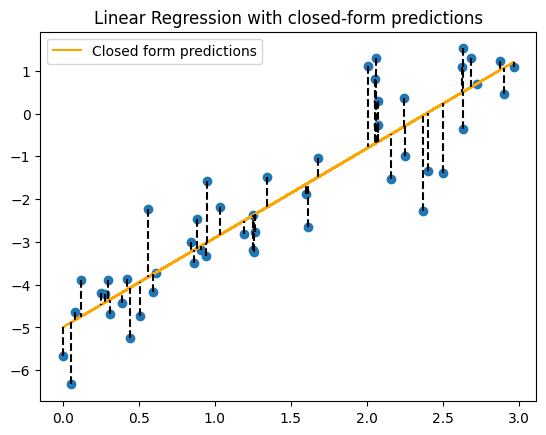

In [47]:
plt.scatter(x, y)
plt.plot(x, y_pred, color="orange", label="Closed form predictions")

# Draw vertical lines from each point to the line
for i, x_i in enumerate(x):
    plt.plot([x_i, x_i, [y[i], y_pred[i]], color='black', linestyle='dashed')

plt.title("Linear Regression with closed-form predictions")
plt.legend()
plt.show()

### Real world data example

Lets use linear regression to solve a small problem. Using GDP per capita, predict a life satisfaction score for a country of your choice.

In [48]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat_df = pd.read_csv(data_root + "lifesat/lifesat.csv")

In [49]:
# Extract X and y
X = lifesat_df[["GDP per capita (USD)"]].values
y = lifesat_df[["Life satisfaction"]].values

In [50]:
lifesat_df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
# Visualise the data
lifesat_df.plot(
    kind="scatter", grid=True, x="GDP per capita (USD)", y="Life satisfaction"
)
plt.show()

In [ ]:
# Select a linear model and train it
model = LinearRegression()
model.fit(X, y)

In [ ]:
# Make a prediction for Cyprus, given GDP is USD 37655.2 in 2020
X_new = [[37655.2]]
y_pred_new = model.predict(X_new)

print(f"Cyprus predicted life satisfaction: {y_pred_new[0][0]:.3f}")

In [ ]:
# Visualise the data
lifesat_df.plot(
    kind="scatter", grid=True, x="GDP per capita (USD)", y="Life satisfaction"
)
plt.scatter(X_new, y_pred_new, c="red", marker="x", label="Cyprus")
plt.legend()
plt.show()

## Multiple linear regression (multiple regression)

We have used linear regression in scenarios where we are predicting one dependent variable (i.e. $y$) from one independent variable (i.e. $x$). Linear regression can be used in situations where we are predicting $y$ from two or more independent variables. Mathematically, it is not quite as simple as performing linear regression for each of the independent variables.

The general equation for multiple linear regression is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

Where:
- $y$ = Dependent variable (what we're predicting)
- $x_1, x_2, ..., x_n$ = Independent variables (predictors)
- $\beta_0$ = Intercept (value of $y$ when all $x$'s are 0)
- $\beta_1, \beta_2, ..., \beta_n$ = Regression coefficients (indicating how much $y$ changes with a unit change in each $x_1, x_2, ..., x_n$ respectively.
- $\epsilon$ = Error term (accounts for variance not explained by the predictors)

A simple example might be trying to predict a person's **salary ($y$)** based on their **years of experience ($x_1$)** and **education level ($x_2$)**. The regression equation might look like:

$$
\text{Salary} = 30,000 + 5000(\text{Years of Experience}) + 2000(\text{Education Level}) + \epsilon
$$


## Multiple regression with synthetic data

As before, we can generate some random data, but this time, for two dependent variables. We will need to combine the feature variables to create a single vector for the model training stage.

In [22]:
X1 = np.random.rand(100, 1) * 10  # First feature
X2 = np.random.rand(100, 1) * 10  # Second feature
y = 2 * X1 + 2 * X2 + np.random.randn(100, 1) * 5

In [ ]:
X = np.hstack((X1, X2))
X.shape

Now we will create and train the model as before:

In [ ]:
model = LinearRegression()
model.fit(X, y)

We can view coefficients (note there are now two):

In [ ]:
model.coef_

But still one intercept:

In [ ]:
model.intercept_

We can still make predictions, but we need to provide two samples, and wrangle them a bit more than before:

In [27]:
# Two new samples for x1 and x2
x1_new = 5
x2_new = 6

# Samples in correct shape for model prediction
X_new = np.array([[x1_new, x2_new]])

In [ ]:
# Predict new y value from two independent variables
y_pred_new = model.predict(X_new)[0][0]

print(y_pred_new)

Finally, what is the equivalent plot? For multiple regression, instead of a line of best fit, we can plot a hyperplane. For two X dimensions and one y dimension, this can be plotted exactly on a 3 dimensional X Y Z plot.

In [ ]:
import plotly.graph_objects as go

In [32]:
# Create meshgrid for the hyperplane
X1_range = np.linspace(X1.min(), X1.max(), 20)
X2_range = np.linspace(X2.min(), X2.max(), 20)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

# These are our y values
y_mesh = model.intercept_ + model.coef_[0][0] * X1_mesh + model.coef_[0][1] * X2_mesh

# Create scatter plot of data
scatter = go.Scatter3d(
    x=X1.flatten(),
    y=X2.flatten(),
    z=y.flatten(),
    mode="markers",
    marker=dict(size=5, color="blue"),
    name="Data",
)

# Create surface plot of regression plane
surface = go.Surface(
    x=X1_mesh,
    y=X2_mesh,
    z=y_mesh,
    colorscale="viridis",
    opacity=0.5,
    name="Regression Plane",
    showscale=False
)

# Create figure
fig = go.Figure(data=[scatter, surface])
fig.update_layout(
    scene=dict(xaxis_title="X1", yaxis_title="X2", zaxis_title="Y"),
    title="Multiple Regression Hyperplane",
)
# You might want to run fig.show() instead of the line below
fig.write_html("../../_static/multiple_regression_hyperplane.html", include_plotlyjs="cdn")

In [ ]:
from IPython.display import HTML, display

# Set the file name for the interactive plot
file_name = "../../_static/multiple_regression_hyperplane.html"

# Generate a unique ID for the iframe
iframe_id = "iframe-multiple_regression_hyperplane"

# Create a display HTML block with a title
html_str = "<div style='text-align: center;'></div>"
html_str += f"<iframe id='{iframe_id}' src='{file_name}' width='100%' height='750px' style='border:none;'></iframe>"

# Include JavaScript to adjust the iframe height based on its width (if desired)
js_code = f"""
<script>
function adjustIframeHeight_{iframe_id}() {{
    const iframe = document.getElementById('{iframe_id}');
    if (iframe) {{
        iframe.style.height = iframe.offsetWidth + 'px';
    }}
}}

// Adjust height on load and resize
window.onload = adjustIframeHeight_{iframe_id};
window.onresize = adjustIframeHeight_{iframe_id};
</script>
"""

html_str += js_code
display(HTML(html_str))

In [34]:
# Compute predicted y values for the actual data points
y_pred = (
    model.intercept_
    + model.coef_[0][0] * X1.flatten()
    + model.coef_[0][1] * X2.flatten()
)

# Create vertical dashed lines from actual data points to predicted points
lines = []
for i in range(len(X1.flatten())):
    lines.append(
        go.Scatter3d(
            x=[X1.flatten()[i], X1.flatten()[i]],
            y=[X2.flatten()[i], X2.flatten()[i]],
            z=[y.flatten()[i], y_pred[i]],
            mode="lines",
            line=dict(color="black", width=4, dash="dash"),
            showlegend=False,
        )
    )

# Add extra point (Red marker)
extra_point = go.Scatter3d(
    x=[x1_new],
    y=[x2_new],
    z=[y_pred_new],
    mode="markers",
    marker=dict(size=8, color="red", symbol="diamond"),
    name="New Point",
)

# Create figure and add all elements
fig = go.Figure(data=[scatter, surface, extra_point] + lines)

# Update layout
fig.update_layout(
    scene=dict(xaxis_title="X1", yaxis_title="X2", zaxis_title="Y"),
    title="Multiple Regression Hyperplane (with vertical residual lines and our added point)",
    showlegend=False,
)
# You might want to run fig.show() instead of the line below
fig.write_html("../../_static/multiple_regression_hyperplane_2.html", include_plotlyjs="cdn")


In [ ]:
from IPython.display import HTML, display

# Set the file name for the interactive plot
file_name = "../../_static/multiple_regression_hyperplane_2.html"

# Generate a unique ID for the iframe
iframe_id = "iframe-multiple_regression_hyperplane_2"

# Create a display HTML block with a title
html_str = "<div style='text-align: center;'></div>"
html_str += f"<iframe id='{iframe_id}' src='{file_name}' width='100%' height='750px' style='border:none;'></iframe>"

# Include JavaScript to adjust the iframe height based on its width (if desired)
js_code = f"""
<script>
function adjustIframeHeight_{iframe_id}() {{
    const iframe = document.getElementById('{iframe_id}');
    if (iframe) {{
        iframe.style.height = iframe.offsetWidth + 'px';
    }}
}}

// Adjust height on load and resize
window.onload = adjustIframeHeight_{iframe_id};
window.onresize = adjustIframeHeight_{iframe_id};
</script>
"""

html_str += js_code
display(HTML(html_str))